# PS3 Discussion: Uncertainty

In this notebook, we're going to go over the concepts of uncertainty using some basic examples: a die and coin. 

First, let's explore the relationship between standard deviation and standard error. 

In [3]:
# creating the sides of a die
dice <- c(1:6)

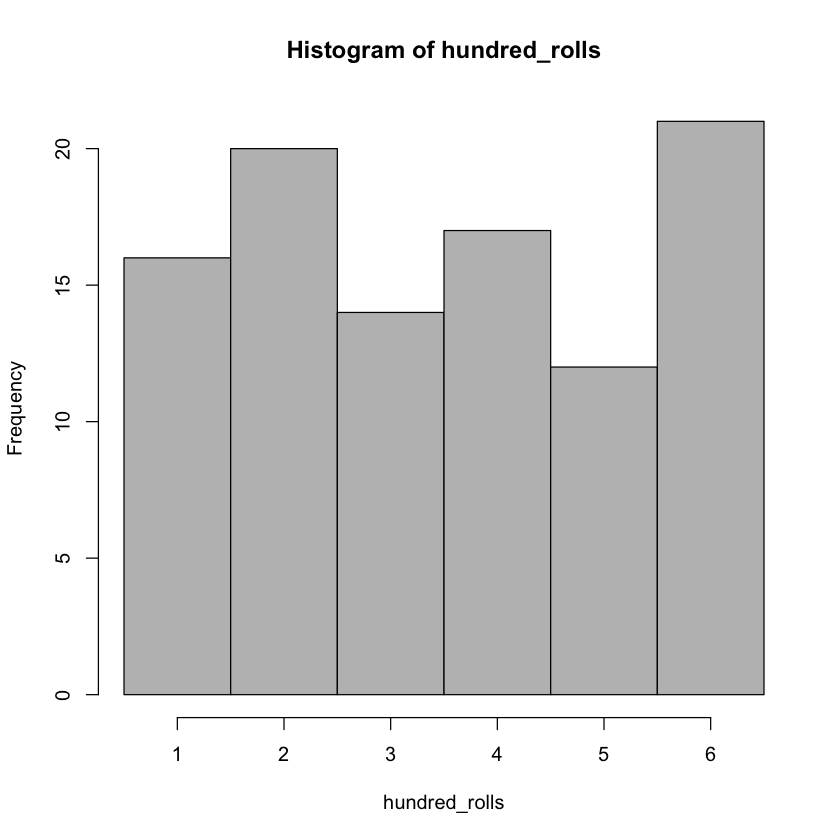

In [53]:
# Let's see the distribution of sides if we roll a die 100 times
hundred_rolls <- sample(dice, 100, replace = TRUE)
hist(hundred_rolls, col = "gray", breaks = c(0.5:6.5))
# Does this look like what you expect? Why? 

In [58]:
# What's the standard deviation of our 100 rolls?
sd(hundred_rolls)
# and the mean of 100 rolls:
mean(hundred_rolls)

[1] 1.77229

[1] 3.52

## Quick Check 1

What is the standard error of the `hundred_rolls` sample above?

Recall: the definition of standard error is `standard deviation of the sample / square root of the sample size`.

In [63]:
standard_error <- sd(hundred_rolls) / sqrt(100)
standard_error

[1] 0.177229

In [60]:
# Now, let's go do 100 rolls, 1000 times
# and calculate the mean for each 100 rolls

sample_means <- array()

for(i in c(1:1000)){
    new_hundred_rolls <- sample(dice, 100, replace = TRUE)
    sample_means[i] <- mean(new_hundred_rolls)
}

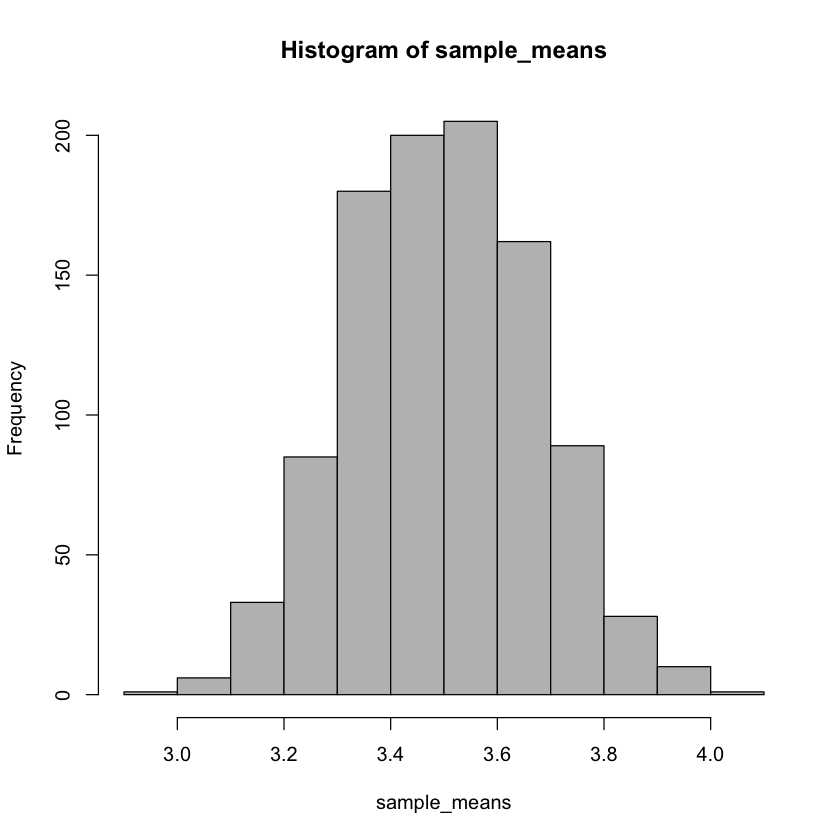

In [61]:
# Distribution of sample means
# What's different about this graph versus the first?
hist(sample_means, col = "gray")

In [93]:
# Standard error = standard deviation of the sample statistic
sd(sample_means)

# Compare to your mathematical calculation from earlier:
standard_error

# Notice the similarity!

[1] 0.1740339

[1] 0.177229

## Now, let's think about the idea of p-values.

Imagine we have a coin. We flip it 10 times, and get 9 heads out of 10 flips. That's weird, because we thought that the coin is fair, and that 50% of the flips should be heads.

So, we want to do an analysis: is the coin fair or biased towards heads? Let's use statistics to learn more about this.

## Quick Check 2:

Null: "The coin is fair and the probability of getting heads or tails is the same. Therefore, if I flipped a coin 10 times, 5 of the flips should be heads, on average." 

What is a reasonable alternative hypothesis? Type your answer into Ed. 

*Hint: what did we observe that was weird? What does that observation suggest about the coin?*

*Type any notes you have here.*

In [67]:
# flipping a fair coin; setting 1 to be heads, 0 to be tails
coin <- c(0, 1)

In [87]:
# flipping this coin 10 times, 1000 times
# assuming that the coin IS fair:

num_heads <- array()

for(i in c(1:1000)){
    heads <- sample(coin, 10, replace = TRUE)
    num_heads[i] <- sum(heads) # finding the number of heads
}

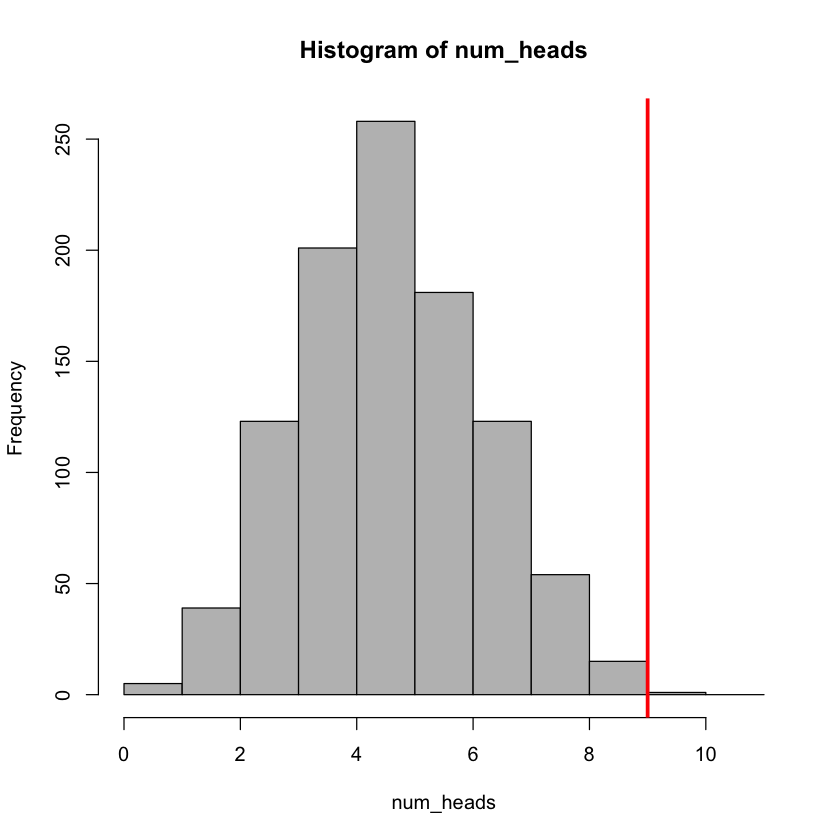

In [90]:
hist(num_heads, breaks = c(0:11), col = "gray")
abline(v = 9, col = "red", lwd = 3)

**Before we calculate the p-value, what does the histogram above tell us about the hypotheses? Discuss with your neighbor.**

Then, take a second to confirm your thoughts by calculating the p-value on your own. 

*Hint:* `num_heads` is a list of numbers of the potential outcomes of flipping a coin, assuming the coin was fair. More extreme, in this case, means greater than the observed value. You can use a Boolean comparison to calculate this!

In [95]:
# p-value: the probability of getting the observed result (9 heads) or something more extreme, under the null hypothesis
sum(num_heads >= 9) / 1000

[1] 0.016

**Let's interpret the data.**

What does that p-value mean in context?

What does it tell you about the coin we have? Is it fair or unfair? 

Talk about this for a bit before we discuss as a class.

*Type your notes here.*

This process of using p-values (and by association, t-scores/standard error) lets us account for the uncertainty caused by random chance (e.g. if we repeated the experiment many times, what are the various potential outcomes that could happen?). 

In practice, when we work with real data, we'll use the `difference_in_means` function to calculate the effect, t-score, standard error, and p-value. This exercise was simply to show the statistical intuition behind these processes!